In [39]:
!pip install keras-tuner

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

In [41]:
data = pd.read_csv('/content/Alphabets_data.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [42]:
data.shape

(20000, 17)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [44]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [45]:
data.drop_duplicates(inplace  = True)
data.reset_index(drop = 'first', inplace = True)

In [46]:
data.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


<Axes: >

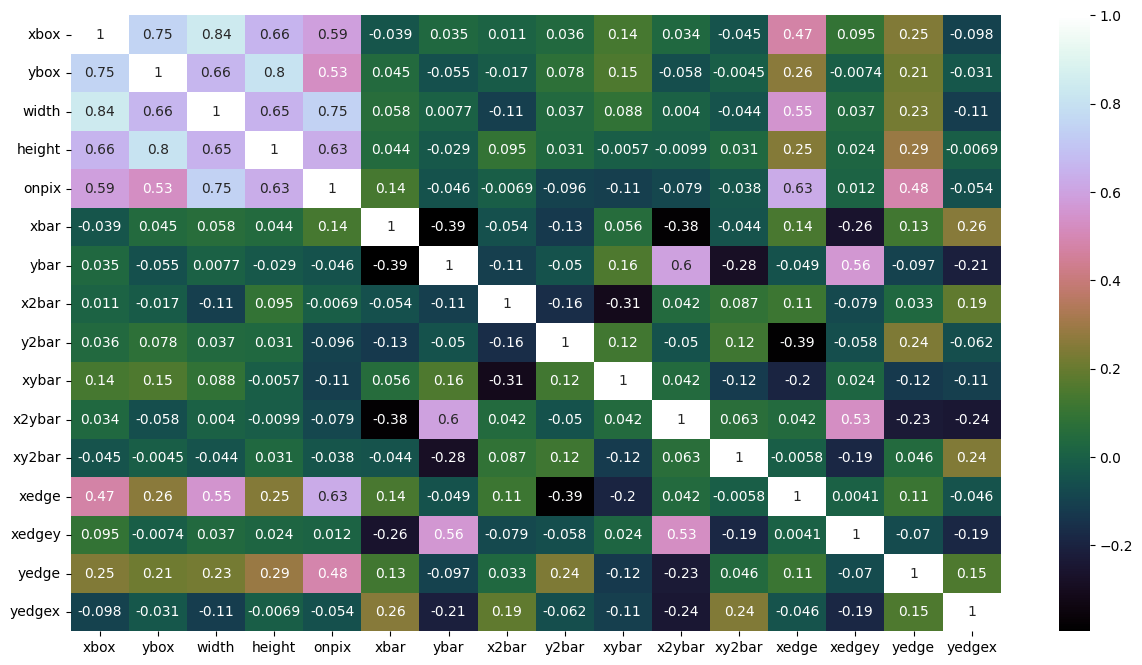

In [47]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='cubehelix')


In [48]:
le = LabelEncoder()
data['letter'] = le.fit_transform(data['letter'])
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
18664,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
18665,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
18666,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [49]:
minmax = MinMaxScaler()
encode_col = data.drop('letter', axis = 1).columns
data[encode_col] = minmax.fit_transform(data[encode_col])
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,8,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,3,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,13,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,6,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,19,0.333333,0.533333,0.466667,0.466667,0.466667,0.466667,0.600000,0.266667,0.533333,0.466667,0.466667,0.533333,0.200000,0.666667,0.533333,0.400000
18664,3,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667
18665,2,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667
18666,19,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667


In [50]:
x = data.drop('letter', axis = 1)
y = data[['letter']]

In [51]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [52]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(
        hp.Int('units_input', min_value=64, max_value=256, step=32),
        activation='relu',
        input_dim=x_train.shape[1]
    ))


    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            activation='relu'
        ))

        if hp.Boolean(f'dropout_{i}'):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))


    model.add(Dense(len(np.unique(y_train)), activation='softmax'))


    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.1, 0.01, 1.0])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [53]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    project_name='ann_tuning'
)


tuner.search(x_train, y_train, epochs=20, validation_data=(x_val, y_val))



Reloading Tuner from ./ann_tuning/tuner0.json


In [55]:
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_model.values)

{'units_input': 192, 'num_layers': 2, 'units_0': 96, 'dropout_0': False, 'learning_rate': 0.01, 'dropout_rate_0': 0.30000000000000004, 'units_1': 32, 'dropout_1': True, 'units_2': 128, 'dropout_2': True, 'dropout_rate_1': 0.1}


In [57]:
def train_ann(x_train, x_test, x_val, y_train, y_val, y_test):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import Adam
    from sklearn.metrics import classification_report
    import numpy as np

    ann_model = Sequential([
        Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(units=len(np.unique(y_train)), activation='softmax')
    ])


    ann_model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )


    history = ann_model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=30,
        batch_size=32,
        verbose=1
    )


    test_loss, test_accuracy = ann_model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")


    predictions = np.argmax(ann_model.predict(x_test), axis=1)
    print(classification_report(y_test, predictions))

    return ann_model, history

ann_model = train_ann(x_train, x_test, x_val, y_train, y_val, y_test)

Epoch 1/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1509 - loss: 2.9093 - val_accuracy: 0.4704 - val_loss: 1.7545
Epoch 2/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4825 - loss: 1.6901 - val_accuracy: 0.5336 - val_loss: 1.5116
Epoch 3/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5595 - loss: 1.4574 - val_accuracy: 0.6054 - val_loss: 1.3649
Epoch 4/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5980 - loss: 1.3492 - val_accuracy: 0.6089 - val_loss: 1.3384
Epoch 5/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6222 - loss: 1.2485 - val_accuracy: 0.6511 - val_loss: 1.1814
Epoch 6/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6594 - loss: 1.1359 - val_accuracy: 0.6321 - val_loss: 1.2077
Epoch 7/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6667 - loss: 1.0971 - val_accuracy: 0.6861 - val_loss: 1.0451
Epoch 8/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6880 - loss: 1.0166 - val_accuracy: 0.

In [59]:
best_ann= build_model(best_model)

best_ann.summary()

best_ann.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 192)            │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 96)             │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,754 (100.60 KB)

 Trainable params: 25,754 (100.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2300 - loss: 2.4773 - val_accuracy: 0.5450 - val_loss: 1.3821
Epoch 2/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5511 - loss: 1.4015 - val_accuracy: 0.6711 - val_loss: 1.0628
Epoch 3/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6168 - loss: 1.1688 - val_accuracy: 0.6821 - val_loss: 0.9568
Epoch 4/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6629 - loss: 1.0287 - val_accuracy: 0.6757 - val_loss: 1.0159
Epoch 5/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6789 - loss: 0.9723 - val_accuracy: 0.7161 - val_loss: 0.9056
Epoch 6/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7018 - loss: 0.9307 - val_accuracy: 0.7679 - val_loss: 0.7428
Epoch 7/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7254 - loss: 0.8432 - val_accuracy: 0.7511 - val_loss: 0.7997
Epoch 8/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7388 - loss: 0.7955 - val_accuracy: 0.

In [60]:
loss1, acc = best_ann.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc}")
y_pred = best_ann.predict(x_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.4657
Test Accuracy: 0.8475544452667236
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [61]:
y_pred_probs = best_ann.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [62]:
np.argmax(y_pred_probs, axis = 1)

array([10, 19,  5, ..., 18,  6,  7])

In [63]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       111
           1       0.86      0.83      0.85       123
           2       0.92      0.83      0.87       121
           3       0.85      0.81      0.83       114
           4       0.70      0.79      0.74       105
           5       0.74      0.84      0.79       116
           6       0.77      0.86      0.81       119
           7       0.84      0.68      0.76        95
           8       1.00      0.76      0.87        93
           9       0.89      0.83      0.86       105
          10       0.76      0.92      0.83       122
          11       0.85      0.90      0.87       112
          12       0.92      0.92      0.92        95
          13       0.84      0.93      0.88        95
          14       0.83      0.83      0.83        83
          15       0.92      0.88      0.89       136
          16       0.93      0.80      0.86       103
          17       0.70    